Test notebook

In [1]:
import missingno as msno

In [2]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", "T1xwTDKrHOiObAuWY2QsXpMDE")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cdc.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("hn4x-zwk7", limit=100000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)


In [3]:
results_csv_df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
results_csv_df.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
1,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
2,2011,2011,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(41.708280193, -71.522470314)",OWS,OWS1,Q036,VALUE,44,Race/Ethnicity,Other,RACE,RACEOTH
3,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824
4,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


<Axes: >

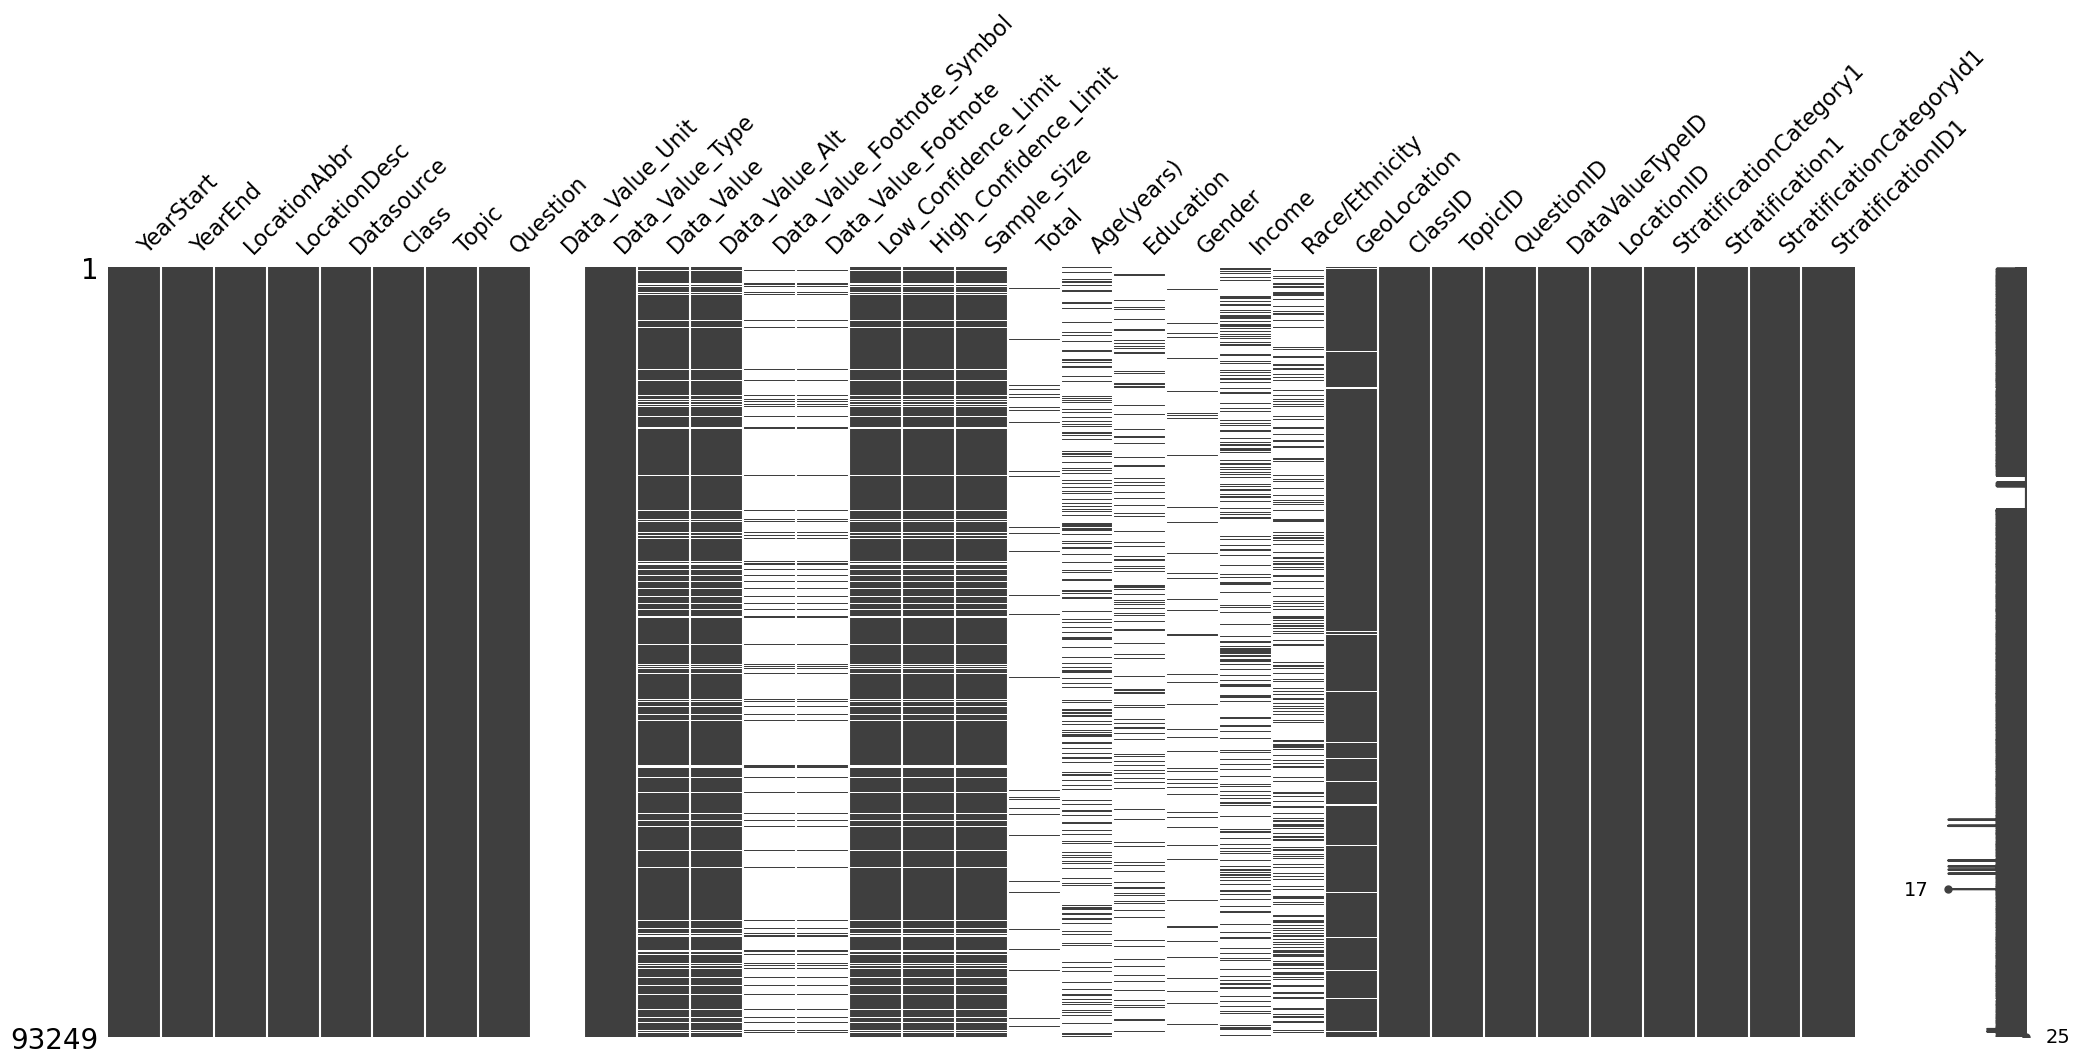

In [4]:
%matplotlib inline
msno.matrix(results_csv_df)

In [5]:
filtered_csv_1 = results_csv_df[
    (results_csv_df['Gender'] != 0) &
    (results_csv_df['Income'] != 0) &
    (results_csv_df['Race/Ethnicity'] != 0)
    & (results_csv_df['Gender'].notnull())
    & (results_csv_df['Income'].notnull())
    & (results_csv_df['Race/Ethnicity'].notnull())
]
len(filtered_csv_1)

0

<Axes: >

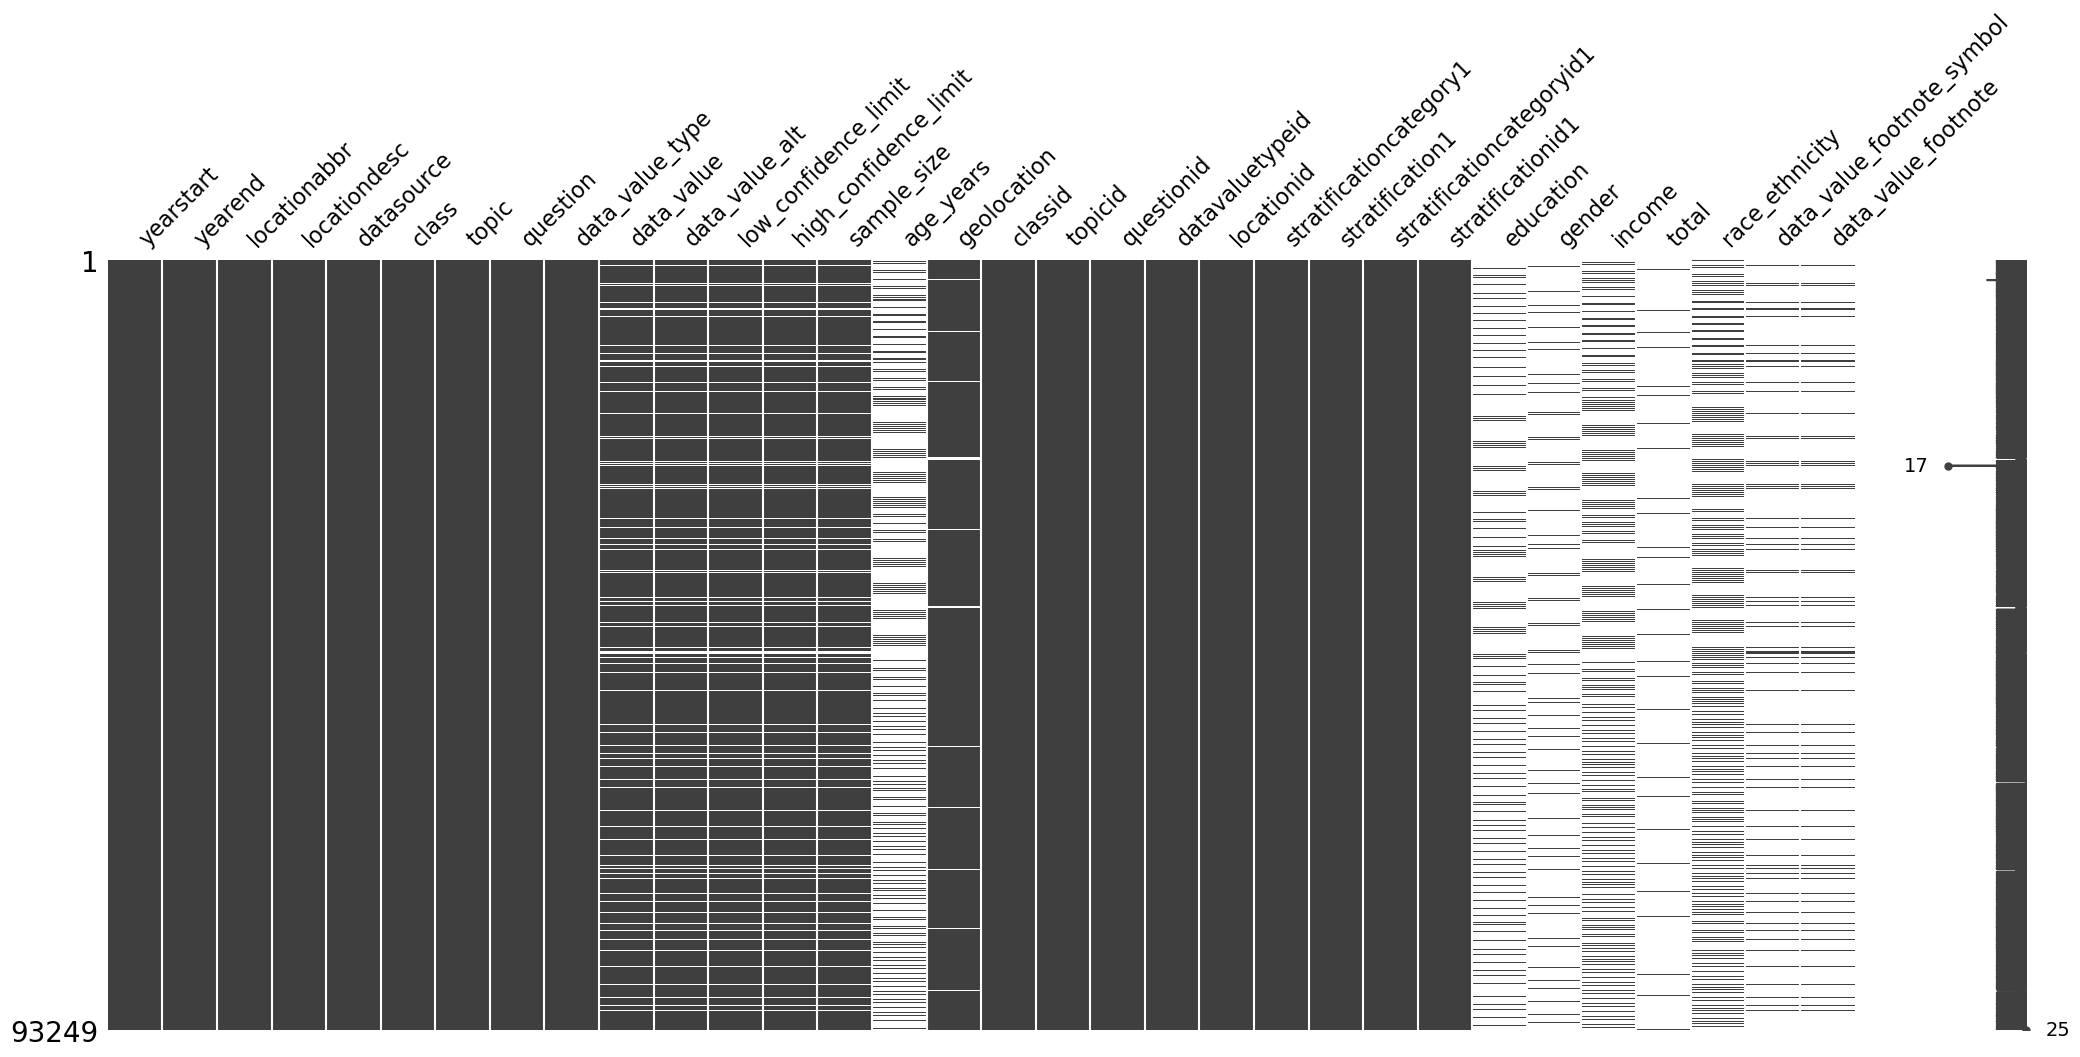

In [6]:
results_df['income']
%matplotlib inline
msno.matrix(results_df)

In [7]:
# results_csv_df.loc[results_csv_df["QuestionID"] == "Q047"]
len(results_csv_df.loc[results_csv_df["QuestionID"] == "Q047"])

18089

In [8]:
filtered_year_data = results_csv_df.loc[results_csv_df["YearStart"] > 2017].sort_values(by=['YearStart', 'Question', 'StratificationCategory1', 'Stratification1', 'LocationDesc'])
#filtered_year_data.to_csv("DNPAO_2018_2022.csv", index=False)
filtered_year_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
60402,2018,2018,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,VALUE,1,Age (years),18 - 24,AGEYR,AGEYR1824
61463,2018,2018,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.84507995700051, -147.72205903599973)",OWS,OWS1,Q037,VALUE,2,Age (years),18 - 24,AGEYR,AGEYR1824
62911,2018,2018,AZ,Arizona,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(34.865970280000454, -111.76381127699972)",OWS,OWS1,Q037,VALUE,4,Age (years),18 - 24,AGEYR,AGEYR1824
60615,2018,2018,AR,Arkansas,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(34.74865012400045, -92.27449074299966)",OWS,OWS1,Q037,VALUE,5,Age (years),18 - 24,AGEYR,AGEYR1824
60882,2018,2018,CA,California,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(37.63864012300047, -120.99999953799971)",OWS,OWS1,Q037,VALUE,6,Age (years),18 - 24,AGEYR,AGEYR1824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92734,2022,2022,VA,Virginia,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(37.54268067400045, -78.45789046299967)",PA,PA1,Q047,VALUE,51,Total,Total,OVR,OVERALL
92981,2022,2022,WA,Washington,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(47.52227862900048, -120.47001078999972)",PA,PA1,Q047,VALUE,53,Total,Total,OVR,OVERALL
93120,2022,2022,WV,West Virginia,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(38.66551020200046, -80.71264013499967)",PA,PA1,Q047,VALUE,54,Total,Total,OVR,OVERALL
93030,2022,2022,WI,Wisconsin,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(44.39319117400049, -89.81637074199966)",PA,PA1,Q047,VALUE,55,Total,Total,OVR,OVERALL


In [9]:
# # Filter the DataFrame based on the Question ID
# data_Q019 = results_csv_df.loc[results_csv_df["QuestionID"] == "Q019"]
data_Q036 = results_csv_df.loc[results_csv_df["QuestionID"] == "Q036"]
# data_Q037 = results_csv_df.loc[results_csv_df["QuestionID"] == "Q046"]
# data_Q046 = results_csv_df.loc[results_csv_df["QuestionID"] == "Q046"]

# # file path where to save the CSV
# output_file_path_1 = "Q019.csv"
output_file_path_2 = "Q036.csv"
# output_file_path_3 = "Q037.csv"
# output_file_path_4 = "Q046.csv"

# # Write the filtered data to a CSV file
# data_Q019.to_csv(output_file_path_1, index=False)
data_Q036.to_csv(output_file_path_2, index=False)
# data_Q037.to_csv(output_file_path_2, index=False)
# data_Q046.to_csv(output_file_path_4, index=False)

# print("Filtered data of Q019 has been saved to", output_file_path_1)
print("Filtered data of Q036 has been saved to", output_file_path_2)
# print("Filtered data of Q037 has been saved to", output_file_path_3)
# print("Filtered data of Q046 has been saved to", output_file_path_4)

Filtered data of Q036 has been saved to Q036.csv
